<a href="https://colab.research.google.com/github/phamhuyen286/Predicting-Weight-of-the-fish/blob/main/Predicting_Weight_of_the_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing & Understanding dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np                # mathematical calculations
import pandas as pd               # manipulation of raw data 
import matplotlib.pyplot as plt   # plotting graphs
%matplotlib inline  

In [ ]:
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Assignments/Data/'

In [ ]:
fish_data = pd.read_csv(path+'Fish.csv')

In [ ]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
fish_data.shape

(159, 7)

The data has 7 columns and 159 row of data. we have to build model to predict weight of the fish from other features. so right now we have 6 features.

In [ ]:
fish_data.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [ ]:
fish_data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

# Encoding data

In [ ]:
# Species column is text so we should encoding this data before processing further

from sklearn.preprocessing import LabelEncoder
Species_le = LabelEncoder()
fish_data['Species'] = Species_le.fit_transform(fish_data['Species'])

In [ ]:
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
5,0,450.0,26.8,29.7,34.7,13.6024,4.9274
6,0,500.0,26.8,29.7,34.5,14.1795,5.2785
7,0,390.0,27.6,30.0,35.0,12.6700,4.6900
8,0,450.0,27.6,30.0,35.1,14.0049,4.8438
9,0,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672
158,5,19.9,13.8,15.0,16.2,2.9322,1.8792


# Features Scaling

In [ ]:
fish = (fish_data - fish_data.mean())/(fish_data.max()-fish_data.min())

In [ ]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-0.377358,-0.094743,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,-0.377358,-0.065652,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,-0.377358,-0.035349,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,-0.377358,-0.021410,0.001026,0.010623,0.038395,0.218184,0.005358
4,-0.377358,0.019196,0.004909,0.010623,0.046840,0.201584,0.100997


# Seperate X and Y from data

In [ ]:
X = fish.drop(columns = ['Weight'])
y = fish.iloc[:, 1:2]

In [ ]:
X.insert(0,'Bias',1)
X.head()

,Bias,Species,Length1,Length2,Length3,Height,Width
0,1,-0.377358,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,1,-0.377358,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,1,-0.377358,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,1,-0.377358,0.001026,0.010623,0.038395,0.218184,0.005358
4,1,-0.377358,0.004909,0.010623,0.046840,0.201584,0.100997


In [ ]:
X.shape, y.shape

((159, 7), (159, 1))

# Splitting the data into the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X_train = np.matrix(X_train)
y_train = np.matrix(y_train)

In [ ]:
theta = np.matrix(np.zeros(7))

In [ ]:
theta.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1, 7), (119, 7), (119, 1), (40, 7), (40, 1))

# Defining the Error & Gradient Descent Function

In [ ]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [ ]:
computeError(X_train,y_train,theta)

0.02671169594239394

In [ ]:
learn_rate = 0.001
iters = 50000
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = theta.shape[1]
  cost =[]

  for i in range(iters):
    error = (x*theta.T)-y
    
    for j in range(parameters):
      gradient = np.multiply(error,x[:,j])
      temp[0,j] = theta[0,j] - ((learn_rate/len(x))*np.sum(gradient))  #assign it to the temp matrix
    
    theta = temp 
    cost_iter = computeError(x,y,theta)

    cost.append(cost_iter)

  return theta,cost


In [ ]:
new_theta,cost = gradientDescent(X_train,y_train,theta,learn_rate,iters)


Plot between cost & number of iterations

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error Vs Iterations')

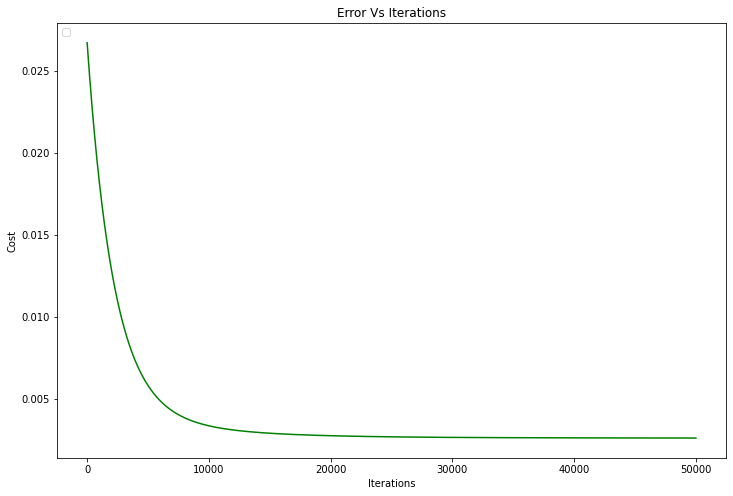

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'g')
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [ ]:
#PREDECTING TRAINING DATASET

Train_model_weight = X_train *new_theta.T


In [ ]:
#PREDECTING Test DATASET
X_test = np.matrix(X_test)
y_test = np.matrix(y_test)
Test_model_weight = X_test * new_theta.T


In [ ]:
Test_model_weight

# Computation of error and accuracy for training data & test data

In [ ]:
from sklearn.metrics import mean_absolute_error

#Train
Train_error = mean_absolute_error(Train_model_weight, y_train)
Train_accuracy = 1 - Train_error

print('Train error ={} % '.format((round(Train_error*100,2))))
print('Train accuacy ={} % '.format((round(Train_accuracy*100,2))))



Train error =5.53 % 
Train accuacy =94.47 % 


In [ ]:
#Test
Test_error = mean_absolute_error(Test_model_weight, y_test)
Test_accuracy =  1 - Test_error

print('Test_error ={} % '.format((round(Test_error*100,2))))
print('Test accuracy ={} % '.format((round(Test_accuracy*100,2))))

Test_error =6.72 % 
Test accuracy =93.28 % 


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
train_score

0.9078066159224003

In [ ]:
y_test_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
test_score

0.7823859196644681

In [ ]:
y_train_pred.shape

(119, 1)